# What is this notebook about?

This notebook is intended as an introduction to the usage of the ```ham1d``` package using a
hands-on example of the Heisenberg-XXZ model.

## The model
The Hamiltonian itself has the following structure: 

$$
H = J\sum_{i} \left[\frac{1}{2}\left(S^+_iS_{i+1}^- + S^-_iS_{i+1}^+\right) + \Delta S_i^z S_{i+1}^z\right] 
$$

Below, we set $J=1$ and $\Delta = 0.5$.
We assume the validity of periodic or open boundary conditions (PBC or OBC).

In [18]:
%matplotlib inline


# to load classes utilizing numba's jit
# compilation optimizations, load the following
# modules. The following lines would load modules
# with routines for creation of spin 1/2 (hard-core
# bosonic) hamiltonians
from ham1d.models import spin1d as sp1

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rc('text', usetex=True)

### Defining the model constants

In [19]:
#first, define the chain length. We choose a rather small system here:
L=12
# define constants and model parameters:
J=1.
Delta = 0.5

### PBC case

In [20]:

J_pm = [[J * 0.5 , i, (i + 1)%L] for i in range(L)] # the %L part ensures PBC

# the first entry in the nested list is always the value of the exchange constant
# the following entries are integers specifying the sites on which the operators act.

# then, specify the operators:
flip_left = ['+-', J_pm]

flip_right = ['-+', J_pm] #couplings remain the same, only the operator order changes

# interaction:
J_zz = [[J*Delta, i, (i+1)%L] for i in range(L)]
inter = ['zz', J_zz]

# we can now put together the static_list -> just a list of hamiltonian term
# definitions

static_list = [flip_left, flip_right, inter]

### Instantiating the Hamiltonian

In [21]:
ham = sp1.hamiltonian(L, static_list, [], Nu=int(L/2.))

# obtain both symmetry operators -> for the parity and particle-hole symmetry
parity_ = ham.parity_shuffle()
part_hole_ = ham.particle_hole_shuffle()
# get the eigensystem
eigvals, eigvecs = ham.eigsystem()

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


### Counting the degeneracies, investigating the parity and particle-hole symmetry properties

#### Degeneration count

In [22]:
# count the degeneracies
u, c = np.unique(np.around(eigvals, decimals=10), return_counts=True)
# sum all the values with multiplicities greater than 1
degs = np.sum(c[c > 1])
# number of unique values
n_unique = len(u)

print(f'Number of degeneracies: {degs}.')
print(f'Number of unique values: {n_unique}.')

Number of degeneracies: 888.
Number of unique values: 373.


#### Symmetry properties of the eigenstates

In [23]:
#act with the parity op. on the eigvectors
eigvecs_parity = eigvecs[parity_,:]
eigvecs_part_hole = eigvecs[part_hole_,:]
# do the product

check_parity = np.diag(eigvecs.T@(np.conj(eigvecs_parity)))
check_part_hole = np.diag(eigvecs.T@(np.conj(eigvecs_part_hole)))

Text(0.5, 1.0, '$L=12, \\, J=1, \\, \\Delta=0.5,\\,$ parity symmetry investigation, PBC')

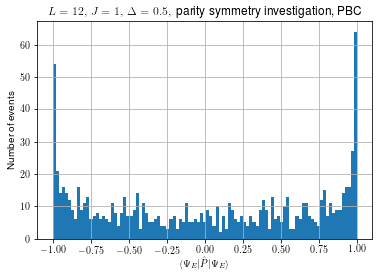

In [24]:
fig = plt.figure()

plt.hist(np.real(check_parity), bins=np.linspace(-1, 1.,100))
plt.grid()
plt.xlabel('$\langle\Psi_E|\hat{P}|\Psi_E\\rangle$')
plt.ylabel('Number of events')
plt.title(f'$L=12, \, J=1, \, \\Delta={Delta},\,$ parity symmetry investigation, PBC')
#plt.show()
#plt.savefig('pbc_isotropic_XXZ_parity_investigation_L12.pdf')

Text(0.5, 1.0, '$L=12, \\, J=1, \\, \\Delta=0.5,\\,$ particle-hole symmetry investigation, PBC')

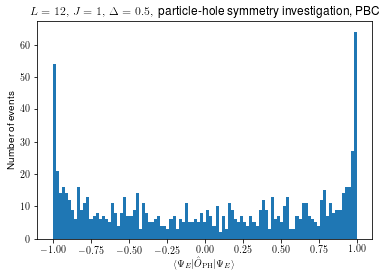

In [25]:
fig = plt.figure()

plt.hist(np.real(check_part_hole), bins=np.linspace(-1, 1., 100))
plt.xlabel('$\langle\Psi_E|\hat{O}_\mathrm{PH}|\Psi_E\\rangle$')
plt.ylabel('Number of events')
plt.title(f'$L=12, \, J=1, \, \\Delta={Delta},\,$ particle-hole symmetry investigation, PBC')
#plt.show()
#plt.savefig('pbc_isotropic_XXZ_part_hole_investigation_L12.pdf')

## OBC case

In [26]:

J_pm_obc = [[J * 0.5 , i, (i+1)] for i in range(L - 1)] 

# the first entry in the nested list is always the value of the exchange constant
# the following entries are integers specifying the sites on which the operators act.

# then, specify the operators:
flip_left_obc = ['+-', J_pm_obc]

flip_right_obc = ['-+', J_pm_obc] #couplings remain the same, only the operator order changes

# interaction:
J_zz_obc = [[J*Delta, i, (i+1)] for i in range(L - 1)]
inter_obc = ['zz', J_zz_obc]

# we can now put together the static_list -> just a list of hamiltonian term
# definitions

static_list_obc = [flip_left_obc, flip_right_obc, inter_obc]

In [27]:
ham_obc = sp1.hamiltonian(L, static_list_obc, [], Nu=int(L/2.))

# obtain both symmetry operators -> for the parity and particle-hole symmetry
parity_obc = ham_obc.parity_shuffle()
part_hole_obc = ham_obc.particle_hole_shuffle()
# get the eigensystem
eigvals_obc, eigvecs_obc = ham_obc.eigsystem()

Please wait, building the Hamiltonian ...
Building the Hamiltonian finished!
Calculating nnz, o_nnz, d_nnz!
Calculating nnz, o_nnz, d_nnz finished!


#### Degeneration count

In [28]:
# count the degeneracies
u_obc, c_obc = np.unique(np.around(eigvals_obc, decimals=10), return_counts=True)
# sum all the values with multiplicities greater than 1
degs_obc = np.sum(c_obc[c_obc > 1])
# number of unique values
n_unique_obc = len(u_obc)

print(f'Number of degeneracies: {degs_obc}.')
print(f'Number of unique values: {n_unique_obc}.')

Number of degeneracies: 438.
Number of unique values: 703.


#### Symmetry properties of the eigenstates

In [29]:
#act with the parity op. on the eigvectors
eigvecs_parity_obc = eigvecs_obc[parity_obc,:]
eigvecs_part_hole_obc = eigvecs_obc[part_hole_obc,:]
# do the product

check_parity_obc = np.diag(eigvecs_obc.T@(np.conj(eigvecs_parity_obc)))
check_part_hole_obc = np.diag(eigvecs_obc.T@(np.conj(eigvecs_part_hole_obc)))

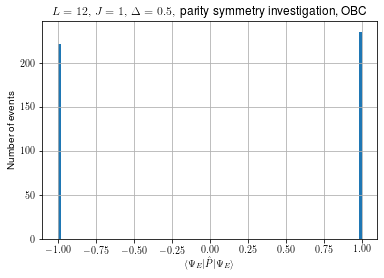

In [30]:
fig = plt.figure()

plt.hist(np.real(check_parity_obc), bins=np.linspace(-1, 1.,100))
plt.grid()
plt.xlabel('$\langle\Psi_E|\hat{P}|\Psi_E\\rangle$')
plt.ylabel('Number of events')
plt.title(f'$L=12, \, J=1, \, \\Delta={Delta},\,$ parity symmetry investigation, OBC')
#plt.show()
plt.savefig(f'obc_delta_{Delta}_XXZ_parity_investigation_L12.pdf')

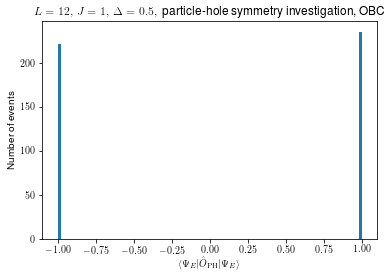

In [31]:
fig = plt.figure()

plt.hist(np.real(check_part_hole_obc), bins=np.linspace(-1, 1., 100))
plt.xlabel('$\langle\Psi_E|\hat{O}_\mathrm{PH}|\Psi_E\\rangle$')
plt.ylabel('Number of events')
plt.title(f'$L=12, \, J=1, \, \\Delta={Delta},\,$ particle-hole symmetry investigation, OBC')
#plt.show()
plt.savefig(f'obc_delta_{Delta}_XXZ_part_hole_investigation_L12.pdf')

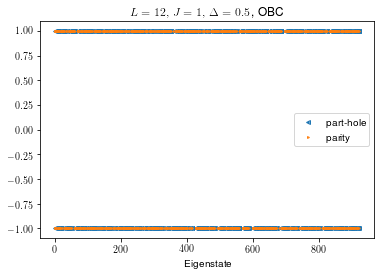

In [41]:
fig = plt.figure()

plt.plot(check_part_hole_obc,'<', label='part-hole', ms=4, fillstyle='left')
plt.plot(check_parity_obc,'>', label='parity', ms=2, fillstyle='none')
plt.legend()
plt.xlabel('Eigenstate')
plt.title(f'$L=12, \, J=1, \, \\Delta={Delta}\,$, OBC')
plt.savefig(f'obc_parity_part_hole_state_delta_{Delta}.pdf')

In [ ]:
plt.plot(eigvals_obc)

In [43]:
parity_obc - part_hole_obc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,